# Yearly model

In [1]:
import torch
from torch import autograd, nn, optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

# Pre-process data

In [2]:
data = pd.read_csv('data.csv',sep=";")
data = data[1828:]

print(data['% FULL'].mean())
display(data)
scaler1 = MinMaxScaler(feature_range=(-1, 1))
data['% FULL']=scaler1.fit_transform(data['% FULL'].values.reshape(-1, 1))
scaler2 = MinMaxScaler(feature_range=(-1, 1))
data['Brent (eur/bbl)']=scaler2.fit_transform(data['Brent (eur/bbl)'].values.reshape(-1, 1))
scaler3 = MinMaxScaler(feature_range=(-1, 1))
data['Coal (eur/t)']=scaler3.fit_transform(data['Coal (eur/t)'].values.reshape(-1, 1))
scaler4 = MinMaxScaler(feature_range=(-1, 1))
data['CO2 (eur/t)']=scaler4.fit_transform(data['CO2 (eur/t)'].values.reshape(-1, 1))
scaler5 = MinMaxScaler(feature_range=(-1, 1))
data['month']=scaler5.fit_transform(data['month'].values.reshape(-1, 1))
scaler6 = MinMaxScaler(feature_range=(-1, 1))
data['5M lagged Brent (usd/bbl)']=scaler6.fit_transform(data['5M lagged Brent (usd/bbl)'].values.reshape(-1, 1))

data_train = data.iloc[:int(data.shape[0]*0.9)]
data_test = data.iloc[int(1+data.shape[0]*0.9):]
display(data_train)
data_train = shuffle(data_train)

X_train= torch.Tensor(data_train[['month','% FULL','Brent (eur/bbl)','5M lagged Brent (usd/bbl)','Coal (eur/t)','CO2 (eur/t)']].astype(np.float32).values)
y_train= torch.tensor(data_train['TTF (eur/Mwh)'].astype(np.float32).values)

X_test= torch.Tensor(data_test[['month','% FULL','Brent (eur/bbl)','5M lagged Brent (usd/bbl)','Coal (eur/t)','CO2 (eur/t)']].astype(np.float32).values)
y_test= torch.tensor(data_test['TTF (eur/Mwh)'].astype(np.float32).values)

58.79648361381755


,date,month,% FULL,Brent (eur/bbl),5M lagged Brent (usd/bbl),Coal (eur/t),CO2 (eur/t),TTF (eur/Mwh)
1828,3/01/2016,1,69.09,34.334132,46.213853,46.63,8.22,14.62
1829,4/01/2016,1,68.52,34.370671,46.076330,46.55,8.04,14.68
1830,5/01/2016,1,67.95,33.891681,45.956147,46.10,7.99,14.70
1831,6/01/2016,1,67.43,31.759139,45.811560,46.90,7.74,15.18
1832,7/01/2016,1,66.88,30.867020,45.666239,47.50,7.54,15.38
1833,8/01/2016,1,66.39,30.698143,45.519725,46.10,7.41,14.57
1834,9/01/2016,1,66.02,30.698143,45.519725,46.10,7.41,14.57
1835,10/01/2016,1,65.70,30.698143,45.519725,46.10,7.41,14.57
1836,11/01/2016,1,65.25,29.054241,45.363211,45.70,7.12,14.48
1837,12/01/2016,1,64.84,28.431915,45.183853,45.00,7.10,14.05


/home/sweerts/anaconda3/envs/trading/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,date,month,% FULL,Brent (eur/bbl),5M lagged Brent (usd/bbl),Coal (eur/t),CO2 (eur/t),TTF (eur/Mwh)
1828,3/01/2016,-1.000000,0.398664,-0.647885,-0.565165,-0.871692,-0.596425,14.62
1829,4/01/2016,-1.000000,0.383127,-0.646412,-0.572176,-0.874372,-0.613358,14.68
1830,5/01/2016,-1.000000,0.367589,-0.665730,-0.578303,-0.889447,-0.618062,14.70
1831,6/01/2016,-1.000000,0.353414,-0.751741,-0.585674,-0.862647,-0.641580,15.18
1832,7/01/2016,-1.000000,0.338422,-0.787722,-0.593082,-0.842546,-0.660395,15.38
1833,8/01/2016,-1.000000,0.325065,-0.794534,-0.600552,-0.889447,-0.672625,14.57
1834,9/01/2016,-1.000000,0.314979,-0.794534,-0.600552,-0.889447,-0.672625,14.57
1835,10/01/2016,-1.000000,0.306256,-0.794534,-0.600552,-0.889447,-0.672625,14.57
1836,11/01/2016,-1.000000,0.293989,-0.860836,-0.608531,-0.902848,-0.699906,14.48
1837,12/01/2016,-1.000000,0.282813,-0.885936,-0.617675,-0.926298,-0.701787,14.05


# Neural network

In [3]:
class Net(nn.Module):
    
    def __init__(self, input_size, hidden1_size, hidden2_size,hidden3_size, hidden4_size, hidden5_size, hidden6_size, hidden7_size,hidden8_size, hidden9_size, hidden10_size,num_classes):
        
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.drop1 = nn.Dropout(p=0.5)
        self.bn1 = nn.BatchNorm1d(hidden1_size)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.drop2 = nn.Dropout(p=0.5)
        self.bn2 = nn.BatchNorm1d(hidden2_size)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(hidden2_size, hidden3_size)
        self.drop3 = nn.Dropout(p=0.5)
        self.bn3 = nn.BatchNorm1d(hidden3_size)
        self.relu3 = nn.ReLU()
        
        self.fc4 = nn.Linear(hidden3_size, hidden4_size)  
        self.drop4 = nn.Dropout(p=0.5)
        self.bn4 = nn.BatchNorm1d(hidden4_size)
        self.relu4 = nn.ReLU()
        
        self.fc5 = nn.Linear(hidden4_size, hidden5_size)  
        self.drop5 = nn.Dropout(p=0.5)
        self.bn5 = nn.BatchNorm1d(hidden5_size)
        self.relu5 = nn.ReLU()
        
        self.fc6 = nn.Linear(hidden5_size, hidden6_size)
        self.drop6 = nn.Dropout(p=0.5)
        self.bn6 = nn.BatchNorm1d(hidden6_size)
        self.relu6 = nn.ReLU()
        
        self.fc7 = nn.Linear(hidden6_size, hidden7_size)
        self.drop7 = nn.Dropout(p=0.5)
        self.bn7 = nn.BatchNorm1d(hidden2_size)
        self.relu7 = nn.ReLU()
        
        self.fc8 = nn.Linear(hidden7_size, hidden8_size)
        self.drop8 = nn.Dropout(p=0.5)
        self.bn8 = nn.BatchNorm1d(hidden8_size)
        self.relu8 = nn.ReLU()
        
        self.fc9 = nn.Linear(hidden8_size, hidden9_size)  
        self.drop9 = nn.Dropout(p=0.5)
        self.bn9 = nn.BatchNorm1d(hidden9_size)
        self.relu9 = nn.ReLU()
        
        self.fc10 = nn.Linear(hidden9_size, hidden10_size)  
        self.drop10 = nn.Dropout(p=0.5)
        self.bn10 = nn.BatchNorm1d(hidden10_size)
        self.relu10 = nn.ReLU()
        
        self.fc11 = nn.Linear(hidden10_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
#         out = self.drop1(out)
        out = self.relu1(out)
#         out= self.bn1(out)        
        
        out = self.fc2(out)
#         out = self.drop2(out)
        out = self.relu2(out)
#         out= self.bn2(out)         
        
        out = self.fc3(out)
#         out = self.drop3(out)
        out = self.relu3(out)
#         out= self.bn3(out)        
        
        out = self.fc4(out)
#         out = self.drop4(out)
        out = self.relu4(out)
#         out= self.bn4(out)        
        
        out = self.fc5(out)
#         out = self.drop5(out)
        out = self.relu5(out)
#         out= self.bn5(out)       

        out = self.fc6(out)
#         out = self.drop6(out)
        out = self.relu6(out)
#         out= self.bn6(out)        
        
        out = self.fc7(out)
#         out = self.drop7(out)
        out = self.relu7(out)
#         out= self.bn7(out)         
        
        out = self.fc8(out)
#         out = self.drop8(out)
        out = self.relu8(out)
#         out= self.bn8(out)        
        
        out = self.fc9(out)
#         out = self.drop9(out)
        out = self.relu9(out)
#         out= self.bn9(out)        
        
        out = self.fc10(out)
#         out = self.drop10(out)
        out = self.relu10(out)
#         out= self.bn10(out)       
        
        out = self.fc11(out)
        return out

# Train it!

In [ ]:
import time
start_time = time.time()
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
# device="cpu"
net = Net(6,6400,6400,6400,6400,6400,6400,6400,6400,6400,6400, 1).to(torch.device(device))  
net.train()
X_train = X_train.float().to(device)
y_train = y_train.float().to(device)
X_test = X_test.float().to(device)
y_test = y_test.float().to(device)


try:
    net.load_state_dict(torch.load('yearly_model.pth'))   
except:
    print("can't load model")
# learning_rate = 0.0000001
learning_rate = 0.0000001
opt = optim.Adam(params=net.parameters(),lr=learning_rate)

loss_train_arr = []
loss_test_arr = []

prev_loss = 1000
curr_loss = 999
epoch = 0

# for epoch in range(2500):
while prev_loss >= curr_loss:
    
    #do the forward propagation
    out_train = net(X_train)
    out_test = net(X_test)

    # Out loss function
    loss_train = F.mse_loss(out_train.view(1, -1), y_train.float().view(1, -1))
    loss_train_arr.append(loss_train.data)
    loss_test = F.mse_loss(out_test.view(1, -1), y_test.float().view(1, -1)).data
    loss_test_arr.append(loss_test)
    prev_loss = curr_loss
    curr_loss = loss_test
    epoch = epoch + 1
    print(epoch, loss_test)

    # Our optimizer
    
    #optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)

    #do back propagation
    opt.zero_grad()
    loss_train.backward()
    
    torch.nn.utils.clip_grad_norm_(net.parameters(), 0.00001)
    torch.nn.utils.clip_grad_norm_(net.parameters(), 0.00001)     

    opt.step()

torch.save(net.state_dict(),'yearly_model.pth')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(loss_train_arr[200:])), loss_train_arr[200:])
plt.plot(np.arange(len(loss_test_arr[200:])), loss_test_arr[200:])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
print(time.time() - start_time)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(loss_train_arr[2000:2500])), loss_train_arr[2000:2500])
plt.plot(np.arange(len(loss_test_arr[2000:2500])), loss_test_arr[2000:2500])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
print(time.time() - start_time)

# Test it!

In [ ]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
net = Net(6,6400,6400,6400,6400,6400,6400,6400,6400,6400,6400, 1).to(torch.device(device))  
try:
    net.load_state_dict(torch.load('yearly_model.pth'))
    net.eval()
except:
    print("can't load model")
learning_rate = 0.0000001
opt = optim.Adam(params=net.parameters(),lr=learning_rate)

X_test = X_test.float().to(device)  
out = net(X_test).data
out = out.cpu().data.numpy()
print(out)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(out)), out)
plt.plot(np.arange(len(out), y_test.cpu()))
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Use it!

,month,% FULL,Brent (eur/bbl),5M lagged Brent (usd/bbl),Coal (eur/t),CO2 (eur/t),current TTF_forward
0,3,36.597339,58.955801,62.9831,73.05,18.84,17.231
1,4,35.448083,58.765445,63.1065,73.85,18.85,17.382
2,5,43.172540,58.704277,64.8854,74.85,18.87,17.532
3,6,53.622625,58.098805,66.4223,75.70,18.89,17.602
4,7,64.293710,57.530877,67.0900,76.30,18.91,17.648
5,8,75.500202,56.971962,67.0200,76.80,18.94,17.713
6,9,84.103875,56.015063,66.8980,77.60,19.05,18.088
7,10,88.709879,55.118175,66.7640,78.35,19.14,19.393
8,11,87.061042,54.274917,66.6320,79.15,19.23,21.108
9,12,76.074395,54.160395,66.4960,79.30,19.33,21.613


,month,% FULL,Brent (eur/bbl),5M lagged Brent (usd/bbl),Coal (eur/t),CO2 (eur/t),current TTF_forward,predicted TTF,market premium
0,3,36.597339,58.955801,62.9831,73.05,18.84,17.231,18.487000,-1.256000
1,4,35.448083,58.765445,63.1065,73.85,18.85,17.382,18.043501,-0.661501
2,5,43.172540,58.704277,64.8854,74.85,18.87,17.532,17.580957,-0.048957
3,6,53.622625,58.098805,66.4223,75.70,18.89,17.602,17.458435,0.143565
4,7,64.293710,57.530877,67.0900,76.30,18.91,17.648,17.688147,-0.040147
5,8,75.500202,56.971962,67.0200,76.80,18.94,17.713,18.214760,-0.501760
6,9,84.103875,56.015063,66.8980,77.60,19.05,18.088,18.996897,-0.908897
7,10,88.709879,55.118175,66.7640,78.35,19.14,19.393,19.780651,-0.387651
8,11,87.061042,54.274917,66.6320,79.15,19.23,21.108,20.319845,0.788155
9,12,76.074395,54.160395,66.4960,79.30,19.33,21.613,20.345587,1.267413


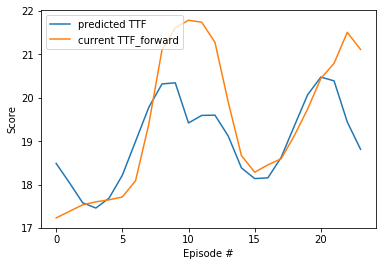

In [5]:
cases = pd.read_csv('Cases.csv',sep=";")
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
display(cases)
net = Net(6,6400,6400,6400,6400,6400,6400,6400,6400,6400,6400, 1).to(torch.device(device))  
net.load_state_dict(torch.load('yearly_model.pth'))
net.eval()

TTF_pred = []
market_premium = []


for i in range(0,cases.shape[0]):    
    columns = ['month','% FULL','Brent (eur/bbl)','5M lagged Brent (usd/bbl)','Coal (eur/t)','CO2 (eur/t)']
    X_use = pd.DataFrame(columns=columns)    
    X_use['month'] = [cases["month"].iloc[i]]
    X_use["% FULL"] = [cases["% FULL"].iloc[i]]
    X_use['Brent (eur/bbl)'] = [cases['Brent (eur/bbl)'].iloc[i]]
    X_use['Coal (eur/t)'] = [cases['Coal (eur/t)'].iloc[i]]
    X_use['CO2 (eur/t)'] = [cases['CO2 (eur/t)'].iloc[i]]
    X_use['5M lagged Brent (usd/bbl)'] = [cases['5M lagged Brent (usd/bbl)'].iloc[i]]

    X_use['% FULL']=scaler1.transform(X_use['% FULL'].values.reshape(-1, 1))
    X_use['Brent (eur/bbl)']=scaler2.transform(X_use['Brent (eur/bbl)'].values.reshape(-1, 1))
    X_use['Coal (eur/t)']=scaler3.transform(X_use['Coal (eur/t)'].values.reshape(-1, 1))
    X_use['CO2 (eur/t)']=scaler4.transform(X_use['CO2 (eur/t)'].values.reshape(-1, 1))
    X_use['month'] = scaler5.transform(X_use['month'].values.reshape(-1, 1))
    X_use['5M lagged Brent (usd/bbl)'] = scaler6.transform(X_use['5M lagged Brent (usd/bbl)'].values.reshape(-1, 1))

    X_use= torch.Tensor(X_use.astype(np.float32).values)
    X_use = X_use.float().to(device) 
    out = net(X_use).data
    out = out.cpu().data.numpy()
    TTF_pred.append(out[0][0])
    market_premium.append(cases["current TTF_forward"].iloc[i] - out[0][0])
    #print("predicted price: ",out[0][0])
    
cases["predicted TTF"] = TTF_pred
cases["market premium"] = market_premium
display(cases)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(cases["predicted TTF"])), cases["predicted TTF"],label='predicted TTF')
plt.plot(np.arange(len(cases["current TTF_forward"])), cases["current TTF_forward"],label='current TTF_forward')
plt.legend(loc='upper left')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()